<div style="text-align: center;">
    <h1>✨ <strong>Nom et Prénom : Laakel Gauzi Soumaya</strong> ✨</h1>
    <h3><strong>Module : Apprentissage automatique</strong></h3>
    <h4><em>MST IASD/S1 2023-2024</em></h4>
    <hr>
    <h2><strong>Exercice 2 : Régression avec SVM - Prix Médian des Maisons en Californie</strong></h2>
    <p><i>Le California Housing Dataset contient des informations socio-économiques sur les maisons en Californie, collectées lors du recensement américain de 1990. Il comprend des variables comme le revenu médian, l'âge moyen des maisons, le nombre de chambres, et la population dans chaque bloc de données géographiques.</i></p>
</div>


# Étape 1: Importation des Bibliothèques et des Données

In [1]:
# Importation des bibliothèques nécessaires
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Chargement de la base d'exemples "California Housing Dataset"
dataset = fetch_california_housing()

# Étape 2: Exploration des données
**Phase de découverte et d'observation pour ainsi collecter de l'information sur les données en vue de prendre des décisions plus tard**
## 2.1 Description
Dans cette étape nous allons :
+ Consulter nos données
+ Identifier notre étiquette ou target
+ Décrire nos types de données

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# Conversion des données en DataFrame pour une meilleure manipulation
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MedHouseVal'] = dataset.target


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Dans le California Housing Dataset, les variables d'entrée (features) et de sortie (target) sont les suivantes :
   #### Variables d'entrée (features)
+  **MedInc :** Revenu médian des ménages dans la zone (en dizaines de milliers de dollars).
+  **HouseAge :** Âge médian des maisons dans la zone (en années).
+  **AveRooms :** Nombre moyen de pièces par logement dans la zone.
+  **AveBedrms :** Nombre moyen de chambres par logement dans la zone.
+  **Population :** Population totale de la zone.
+  **AveOccup :** Nombre moyen de résidents par logement dans la zone.
+  **Latitude :** Latitude géographique de la zone.
+  **Longitude :** Longitude géographique de la zone.
  #### Variable de sortie (target)   
+ **MedHouseVal :** Valeur médiane des maisons dans la zone (en centaines de milliers de dollars). Cette variable est celle qu’on cherche souvent à prédire dans des modèles de régression.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


   Notre dataset contient 
* **`20640 lignes`** et **`9 colonnes`**, 
* **`9 des colonnes`** contiennent des valeurs numériques (de type float64)

### Valeurs manquantes

In [7]:
df.isna()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [8]:
df.sum().isna()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

   Dans ce cas, le résultat montre **False** pour chaque colonne, ce qui signifie **qu'il n'y a aucune valeur manquante dans toutes les colonnes du dataset** :
   **MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, et MedHouseVal** sont toutes complètes.

### doublons dans le dataset

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

La sortie montre que chaque ligne a la valeur **False**, ce qui signifie **qu'il n'y a aucun doublon dans le dataset**. Toutes les lignes sont **uniques**.

## 2.2 Visualisation

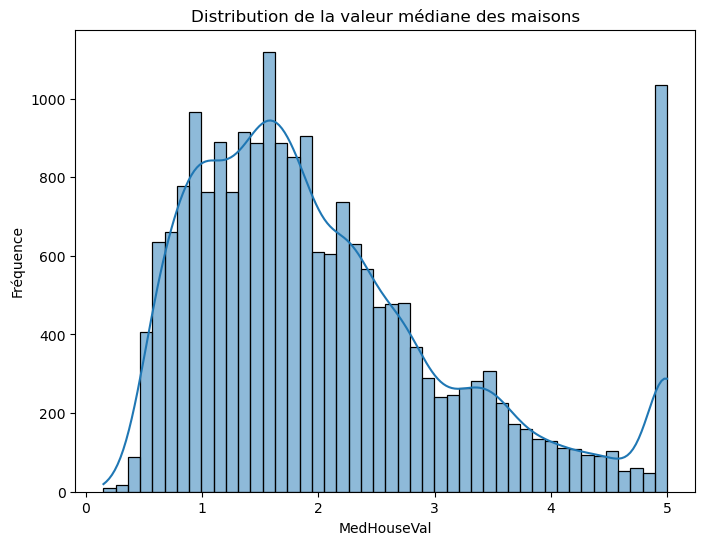

In [10]:
# Distribution de la variable MedHouseVal
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Distribution de la valeur médiane des maisons")
plt.xlabel("MedHouseVal")
plt.ylabel("Fréquence")
plt.show()

Ce graphique représente **la distribution de la valeur médiane des maisons**. On observe un pic de fréquence autour de la valeur 2, indiquant que la plupart des maisons ont une valeur médiane autour de ce niveau. Cependant, il y a un pic notable vers la valeur 5 , qui pourrait représenter un effet de plafonnement (par exemple, les valeurs au-delà de 5 sont peut-être regroupées dans cette catégorie maximale).

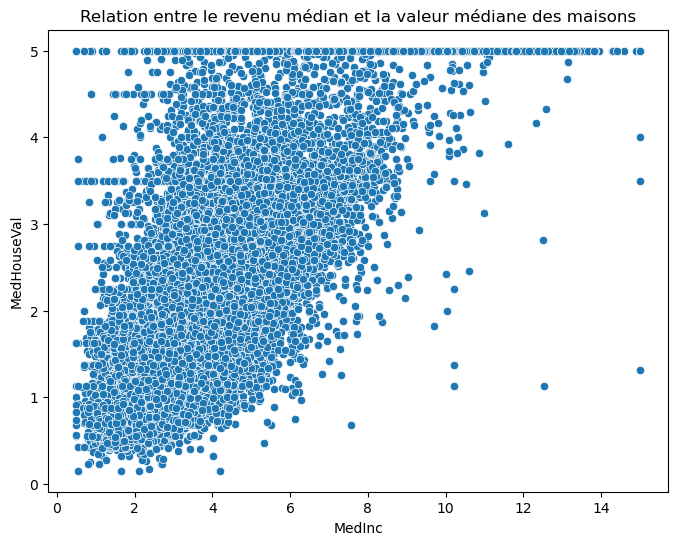

In [11]:
# Scatter plot entre MedInc et MedHouseVal
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title("Relation entre le revenu médian et la valeur médiane des maisons")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

Ce graphique en nuage de points montre la relation entre le revenu médian (axe des abscisses, MedInc) et la valeur médiane des maisons (axe des ordonnées, MedHouseVal): 

+ On observe une tendance générale où une augmentation du revenu médian est associée à une augmentation de la valeur médiane des maisons, ce qui suggère une corrélation positive entre ces deux variables.
+ Cependant, de nombreux points se situent à la valeur de MedHouseVal = 5, indiquant probablement un plafonnement des données pour les valeurs supérieures à 5, comme vu dans le graphique précédent.

Cette relation positive confirme que les zones avec un revenu plus élevé tendent à avoir des maisons plus chères, mais le plafonnement à 5 pour la valeur des maisons peut limiter l'interprétation précise pour les logements très onéreux.

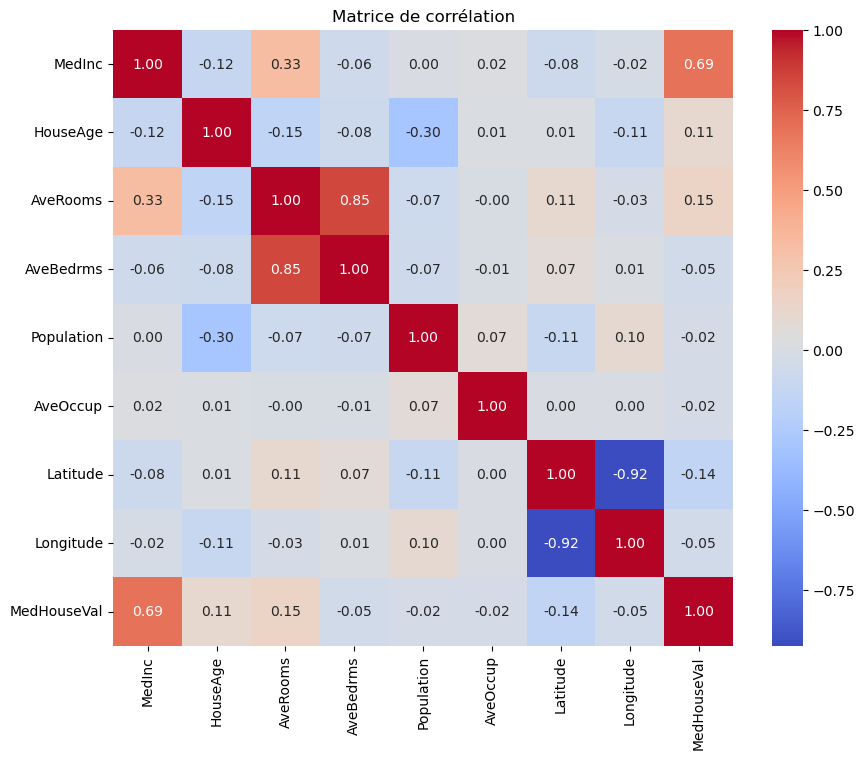

In [12]:
# Heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

Cette matrice de corrélation montre les relations entre différentes variables de l'ensemble de données, avec des valeurs allant de -1 (corrélation négative parfaite) à 1 (corrélation positive parfaite). Ce qui ressort de manière notable est la forte corrélation positive de **0,69** entre le revenu médian **(MedInc)** et la valeur médiane des maisons **(MedHouseVal)**, ce qui confirme que les zones avec un revenu plus élevé tendent à avoir des maisons plus chères. D'autres corrélations élevées incluent celle entre le nombre moyen de chambres **(AveRooms)** et le nombre moyen de chambres à coucher **(AveBedrms)** à **0,85**, ce qui est attendu car les deux variables mesurent des aspects similaires de la taille des logements. Il est également important de noter la forte corrélation négative entre la latitude et la longitude (-0,92), probablement due à la distribution géographique des données.

**La matrice de corrélation montre quelques relations linéaires partielles, mais la majorité des variables n'ont pas de fortes corrélations linéaires avec la variable cible (MedHouseVal). En général, cela suggère que les données ne sont pas entièrement linéaires. Un modèle capable de capturer des relations non linéaires pourrait mieux s'adapter à ces données**

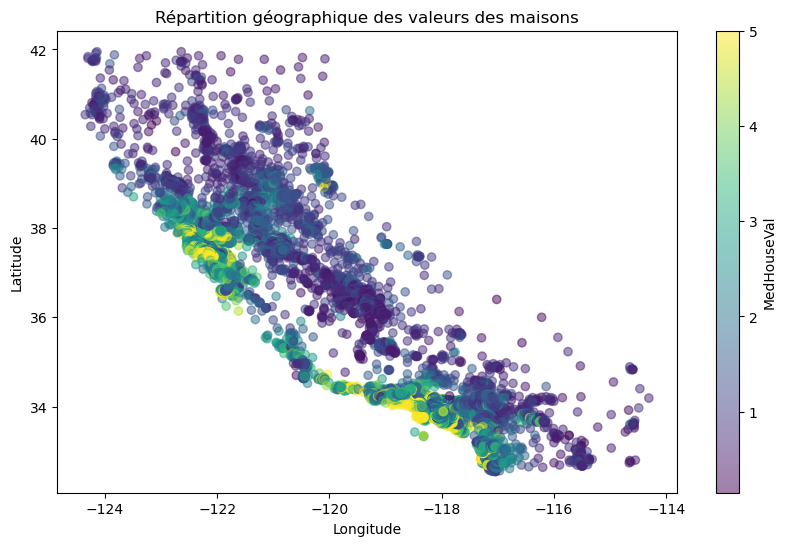

In [13]:
# Distribution géographique
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='viridis', alpha=0.5)
plt.colorbar(label='MedHouseVal')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Répartition géographique des valeurs des maisons")
plt.show()

Ce graphique montre la répartition géographique des valeurs médianes des maisons en fonction de la latitude et de la longitude. Les points sont colorés selon la valeur médiane des maisons (MedHouseVal), allant de 1 (en violet foncé) à 5 (en jaune).

+ Les zones côtières (notamment près de la longitude -118) présentent des valeurs médianes de maisons plus élevées, indiquées par des couleurs plus claires (jaune/vert).
+ À mesure que l'on s'éloigne de la côte vers l'intérieur (plus à l'est et au nord), les valeurs médianes des maisons tendent à diminuer, passant à des couleurs plus sombres.

**La proximité de la côte semble être un facteur important pour la hausse des valeurs des maisons, probablement en raison de l'attrait des zones côtières et de la demande élevée.**

# Étape 3 : Séparation et Normalisation

In [46]:
# Séparation des données en ensembles d'entraînement et de test
X = df.drop('MedHouseVal', axis=1)  # Caractéristiques
y = df['MedHouseVal']  # Variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalisation des données (échelle Standard)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Étape 4: Implémentation Personnalisée de SVM pour la Régression

La régression SVM vise à prédire une valeur continue tout en minimisant une perte spécifique. La fonction de coût n'inclut pas de pénalité lorsque la différence entre la valeur prédite et la vraie valeur est inférieure à un seuil 𝜖. En dehors de ce **tube
ϵ-sensible**, une pénalité proportionnelle est appliquée.
## Formulation mathématique:
L'objectif est de résoudre le problème d'optimisation suivant :
$$ \min_{w, b, \xi, \xi^*} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*) $$
sous les contraintes :
$$
y_i - (w^T x_i + b) \leq \epsilon + \xi_i \quad \text{et} \quad (w^T x_i + b) - y_i \leq \epsilon + \xi_i^*
$$

avec 

$$
\xi_i, \xi_i^* \geq 0.
$$



![Illustration de la régression SVM](https://cedric.cnam.fr/vertigo/cours/ml2/_images/algnoyaux05.png)




L'implémentation de ce modèle de **régression SVM** repose sur le principe des **vecteurs de support et de l'utilisation d'un noyau pour transformer les données dans un espace où les relations non linéaires deviennent linéaires**. Voici les étapes clés du principe de cette implémentation :
### 1- Initialisation des Hyperparamètres et Variables
+ **Hyperparamètres :** **`gamma`**, **`learning_rate`**, **`lambda_param`**, **`epsilon`**, **`n_iters`**,**`kernel='rbf'`** sont fixés lors de l'initialisation pour contrôler l'apprentissage et la régularisation du modèle.
+ **Coefficients :** Les valeurs de **alpha** (variables duales qui agissent sur chaque échantillon) et **b (biais)** sont initialisées. **alpha est un vecteur de taille égale au nombre d'échantillons.**

### 2- Calcul du Noyau RBF
Pour gérer la non-linéarité des données, on utilise un noyau RBF qui projette les données dans un espace de caractéristiques de dimension supérieure. Le noyau RBF calcule la similarité entre les points en fonction de la distance entre eux, en utilisant un facteur d’échelle gamma. Le noyau RBF est donné par :
$$
K(x_i, x_j) = \exp(-\gamma \cdot ||x_i - x_j||^2)
$$
Cette transformation permet de traiter des relations complexes entre les données.
### 3- Entraînement du modèle (fit) Descente de gradient

L'algorithme d'entraînement consiste à utiliser **la descente de gradient*** pour ajuster les paramètres alpha (les coefficients associés aux échantillons d'entraînement) et b (le biais). Le processus de mise à jour se fait comme suit :

+ **Matrice de noyau (K) :** La matrice de noyau K est calculée entre tous les échantillons d'entraînement, ce qui donne une mesure de similarité entre chaque échantillon.
+ **Prédictions et erreurs :** Les prédictions sont faites en calculant np.dot(K, self.alpha) + self.b, puis les erreurs sont calculées comme la différence entre les vraies valeurs y et les prédictions.
+ **Mise à jour des coefficients (alpha) et du biais (b) :** Les alpha sont mis à jour uniquement pour les échantillons dont l'erreur est supérieure à un certain seuil epsilon. La mise à jour des alpha est effectuée en fonction de l'erreur et de la régularisation (pour éviter des valeurs trop grandes).
### 4- Sélection des vecteurs de support
À la fin de l'entraînement, les échantillons qui ont une erreur supérieure à epsilon sont considérés comme des vecteurs de support. Ces échantillons sont cruciaux pour la construction du modèle, car ils définissent la frontière de décision dans un espace de caractéristiques transformé 
### 5- Prédiction pour de Nouvelles Données

Lors de la prédiction pour de nouveaux échantillons, le modèle utilise les vecteurs de support pour effectuer les calculs :

+ Calculer les similarités entre les nouveaux échantillons et les vecteurs de support à l'aide du noyau.
+ Faire des prédictions en calculant une combinaison linéaire des valeurs alpha associées aux vecteurs de support, plus le biais b

In [24]:
import numpy as np

class SVR_Regressor:
    def __init__(self, kernel='rbf', gamma=0.1, learning_rate=0.00001, lambda_param=0.01, epsilon=0.1, n_iters=1000):
        self.kernel = kernel
        self.gamma = gamma
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epsilon = epsilon
        self.n_iters = n_iters
        self.alpha = None
        self.b = 0
        self.support_vectors_ = None  # Attribut pour stocker les vecteurs de support
        self.support_vector_indices_ = None  # Stocke les indices des vecteurs de support

    def _rbf_kernel(self, X, Y):
        """Noyau RBF"""
        sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Y**2, axis=1) - 2 * np.dot(X, Y.T)
        return np.exp(-self.gamma * sq_dists)

    def _apply_kernel(self, X, Y):
        """Applique le noyau choisi (ici, RBF)"""
        if self.kernel == 'rbf':
            return self._rbf_kernel(X, Y)
        else:
            raise ValueError("Noyau non supporté. Utilisez 'rbf'.")

    def fit(self, X, y):
        n_samples = X.shape[0]
        K = self._apply_kernel(X, X)  # Matrice de noyau
        self.alpha = np.zeros(n_samples)

        for i in range(self.n_iters):
            prediction = np.dot(K, self.alpha) + self.b
            error = y - prediction

            # Mise à jour des alpha uniquement si l'erreur dépasse epsilon
            mask = np.abs(error) > self.epsilon
            dalpha = -self.lr * (error[mask] + 2 * self.lambda_param * self.alpha[mask])
            self.alpha[mask] -= dalpha
            self.b -= self.lr * np.sum(error[mask]) / n_samples

            # Affichage de la moyenne de l'erreur pour surveiller la convergence
            if i % 100 == 0:
                error_mean = np.mean(np.abs(error))
                print(f"Iteration {i}: Error mean = {error_mean}")

        # Sélection des indices des vecteurs de support
        self.support_vector_indices_ = np.where(np.abs(y - (np.dot(K, self.alpha) + self.b)) > self.epsilon)[0]
        self.support_vectors_ = X[self.support_vector_indices_]

    def predict(self, X):
        """Prédictions sur les données d'entrée en utilisant les vecteurs de support"""

        # Vérifier et ajuster les dimensions de X et des vecteurs de support
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)  # Si X est un vecteur 1D, convertir en matrice 2D
        if len(self.support_vectors_.shape) == 1:
            self.support_vectors_ = self.support_vectors_.reshape(-1, 1)  # Si les vecteurs de support sont en 1D, convertir en 2D

        # Vérifier que les dimensions de X et des vecteurs de support sont compatibles
        if X.shape[1] != self.support_vectors_.shape[1]:
            raise ValueError(f"Les dimensions de X ({X.shape[1]}) et des vecteurs de support ({self.support_vectors_.shape[1]}) ne sont pas compatibles pour le produit scalaire.")

        # Appliquer le noyau RBF
        K_sv = self._apply_kernel(X, self.support_vectors_)

        # Calculer les prédictions
        return np.dot(K_sv, self.alpha[self.support_vector_indices_]) + self.b



In [25]:
clf = SVR_Regressor(gamma=0.1, learning_rate=0.00001, lambda_param=0.01, epsilon=0.1, n_iters=1000)
clf.fit(X_train_scaled, y_train)


Iteration 0: Error mean = 2.071946937378876
Iteration 100: Error mean = 0.7436594264701695
Iteration 200: Error mean = 0.6656313426124868
Iteration 300: Error mean = 0.6272768866270353
Iteration 400: Error mean = 0.6008679461371926
Iteration 500: Error mean = 0.5807040082021997
Iteration 600: Error mean = 0.5645818303458696
Iteration 700: Error mean = 0.5515543527107457
Iteration 800: Error mean = 0.5409694740190962
Iteration 900: Error mean = 0.5323004733113655


In [26]:
# Prédictions
predictions = clf.predict(X_test_scaled)
print(predictions)

[0.8395489  1.60659829 2.54188006 ... 4.37580223 1.1344529  1.86670214]


In [28]:
# Calcul de l'erreur absolue moyenne (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calcul du coefficient de détermination (R²)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calcul de l'erreur quadratique moyenne (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calcul des métriques
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Affichage des résultats
print(f"SVM Regression Mean Squared Error: {mse}")
print(f"SVM Regression Mean Absolute Error: {mae}")
print(f"SVM Regression R² Score: {r2}")


SVM Regression Mean Squared Error: 0.5748133234879369
SVM Regression Mean Absolute Error: 0.5280904118613047
SVM Regression R² Score: 0.5613481492933836


+ Une **MSE** de 0.5748 indique que, en moyenne, les erreurs (les écarts entre les valeurs prédites et réelles) sont relativement petites, mais il y a encore une marge d'amélioration pour réduire l'erreur.
+ Une **MAE** de 0.5281 indique que, en moyenne, l'écart entre les prédictions et les valeurs réelles est de 0.528. Cela signifie que les prédictions sont assez proches des valeurs réelles, mais le modèle pourrait encore être amélioré pour réduire cette erreur.
+ Un **R²** de 0.5613 signifie que le modèle explique environ 56% de la variance des données. C'est un bon résultat, mais cela suggère qu'il y a encore de l'espace pour améliorer le modèle, soit en ajustant les paramètres, soit en utilisant d'autres techniques de régularisation ou de sélection de caractéristiques.

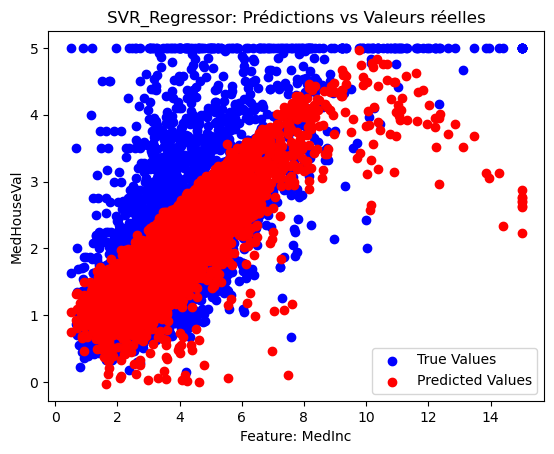

In [32]:
# Visualisation des données et des prédictions pour toutes les caractéristiques
plt.scatter(X_test[feature_name], y_test, color='blue', label='True Values')
plt.scatter(X_test[feature_name], predictions, color='red', label='Predicted Values')
plt.xlabel(f'Feature: {feature_name}')
plt.ylabel('MedHouseVal')
plt.title('SVR_Regressor: Prédictions vs Valeurs réelles')
plt.legend()
plt.show()


### SVR implémenté
+ Les points bleus (Valeurs réelles) : Représentent les valeurs observées de MedHouseVal pour les échantillons de test en fonction de la caractéristique MedInc. On observe une tendance générale, où les valeurs de MedHouseVal augmentent avec MedInc, ce qui est logique, car des revenus plus élevés sont souvent corrélés avec des valeurs immobilières plus élevées.

+ Les points rouges (Valeurs prédites) : Représentent les valeurs de MedHouseVal prédites par le modèle SVR pour les mêmes valeurs de MedInc. On constate que les prédictions suivent approximativement la tendance des valeurs réelles, mais il y a des écarts visibles.

+ Écarts entre les prédictions et les valeurs réelles :

  + Pour les faibles valeurs de MedInc (en bas à gauche), les prédictions semblent relativement proches des valeurs réelles, ce qui indique que le modèle parvient bien à capturer la tendance dans cette région.
  + Pour les valeurs élevées de MedInc (vers la droite de l'image), on observe une dispersion plus large des prédictions autour des valeurs réelles. Cela pourrait indiquer une difficulté du modèle à bien prédire les valeurs de MedHouseVal pour les revenus plus élevés. Ce phénomène peut être dû à une quantité limitée de données dans cette gamme de MedInc ou à une complexité du modèle insuffisante pour capturer la relation dans cette région.

# Étape 5 : Utilisation de SVR de scikit-learn

In [36]:
model_SVR=SVR(gamma=0.1,epsilon=0.1)
model_SVR.fit(X_train_scaled, y_train)

SVR(gamma=0.1)

In [40]:
# Prédictions
predictions1 = model_SVR.predict(X_test_scaled)
print(predictions)

[0.53633735 1.61244284 3.47330149 ... 4.76280671 0.71419999 1.74907884]


In [43]:
# Calcul de l'erreur absolue moyenne (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calcul du coefficient de détermination (R²)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calcul de l'erreur quadratique moyenne (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calcul des métriques
mse = mean_squared_error(y_test, predictions1)
mae = mean_absolute_error(y_test, predictions1)
r2 = r2_score(y_test, predictions1)

# Affichage des résultats
print(f"SVR de scikit learn Mean Squared Error: {mse}")
print(f"SVR scikit learn Mean Absolute Error: {mae}")
print(f"SVR scikit learn R² Score: {r2}")


SVR de scikit learn Mean Squared Error: 0.36578944823936493
SVR scikit learn Mean Absolute Error: 0.4050112687246496
SVR scikit learn R² Score: 0.7208585607140736


Les résultats montrent que le modèle SVR de scikit-learn atteint un MSE de 0.366, un MAE de 0.405 et un R² de 0.721, indiquant une précision raisonnable avec des erreurs modérées.

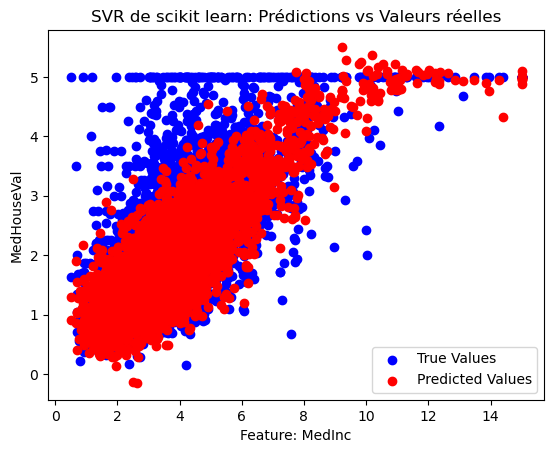

In [45]:
# Visualisation des données et des prédictions pour toutes les caractéristiques
plt.scatter(X_test[feature_name], y_test, color='blue', label='True Values')
plt.scatter(X_test[feature_name], predictions1, color='red', label='Predicted Values')
plt.xlabel(f'Feature: {feature_name}')
plt.ylabel('MedHouseVal')
plt.title('SVR de scikit learn: Prédictions vs Valeurs réelles')
plt.legend()
plt.show()


### SVR de Scikit learn

+ Points bleus (Valeurs réelles) : Ils représentent les valeurs réelles de MedHouseVal pour chaque MedInc. On observe une corrélation positive : à mesure que MedInc augmente, MedHouseVal tend à augmenter également.

+ Points rouges (Valeurs prédites) : Ils représentent les valeurs prédites par le modèle SVR. Les prédictions suivent globalement la tendance des valeurs réelles, mais montrent des écarts, notamment aux extrémités.

+ Observation des écarts : Pour les valeurs élevées de MedInc, les prédictions sont plus dispersées et tendent à dévier davantage des valeurs réelles.

# Étape 5 :Comparaison entre le SVR implémenté et le SVR de Scikit-learn

### Comparaison des métriques entre le SVR implémenté et le SVR de scikit-learn

| **Métriques**           | **SVR Implémenté**   | **SVR scikit-learn** |
|-------------------------|----------------------|----------------------|
| **Mean Squared Error**  | 0.5748133234879369   | 0.36578944823936493  |
| **Mean Absolute Error** | 0.5280904118613047   | 0.4050112687246496   |
| **R² Score**            | 0.5613481492933836   | 0.7208585607140736   |

### Conclusion :
- Le **SVR implémenté** présente des valeurs de **Mean Squared Error (MSE)** et de **Mean Absolute Error (MAE)** plus élevées que celles du modèle **SVR scikit-learn**.
- Le **R² Score** du **SVR scikit-learn** est également supérieur, indiquant que ce modèle s'ajuste mieux aux données.
- En résumé, l'implémentation de **scikit-learn** surpasse celle manuelle en termes de performance globale.
